In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/car-truck-datasets/car-truck-dataset-1000.zip .

In [ ]:
!unzip car-truck-dataset-1000.zip

Archive:  car-truck-dataset-1000.zip
   creating: car-truck-dataset/
   creating: car-truck-dataset/train/
   creating: car-truck-dataset/train/Car/
  inflating: car-truck-dataset/train/Car/00002.jpeg  
  inflating: car-truck-dataset/train/Car/00004.jpeg  
  inflating: car-truck-dataset/train/Car/00005.jpeg  
  inflating: car-truck-dataset/train/Car/00006.jpeg  
  inflating: car-truck-dataset/train/Car/00008.jpeg  
  inflating: car-truck-dataset/train/Car/00010.jpeg  
  inflating: car-truck-dataset/train/Car/00011.jpeg  
  inflating: car-truck-dataset/train/Car/00016.jpeg  
  inflating: car-truck-dataset/train/Car/00017.jpeg  
  inflating: car-truck-dataset/train/Car/00019.jpeg  
  inflating: car-truck-dataset/train/Car/00020.jpeg  
  inflating: car-truck-dataset/train/Car/00023.jpeg  
  inflating: car-truck-dataset/train/Car/00025.jpeg  
  inflating: car-truck-dataset/train/Car/00028.jpeg  
  inflating: car-truck-dataset/train/Car/00030.jpeg  
  inflating: car-truck-dataset/train/Car/

In [ ]:
dataset_dir = '/content/car-truck-dataset/train'

flat_data_arr=[] #input array
target_arr=[] #output array

In [ ]:
categories = ['Car', 'Truck']

In [ ]:
for i in categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(dataset_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img), plugin='matplotlib')
        img_resized=resize(img_array,(128,128,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : Car
loaded category:Car successfully
loading... category : Truck
loaded category:Truck successfully


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


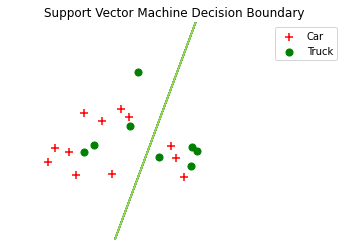

In [ ]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
import pylab as pl
import numpy as np

x = flat_data
y = target
X_train, X_test, y_train, y_test =   train_test_split(x, y, test_size=0.10, random_state=42)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
svmClassifier_2d =   svm.LinearSVC(random_state=42).fit(   pca_2d, y_train)
for i in range(0, 20):
  if y_train[i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
  elif y_train[i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
pl.legend([c1, c2], ['Car', 'Truck'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Boundary')
pl.axis('off')
pl.show()

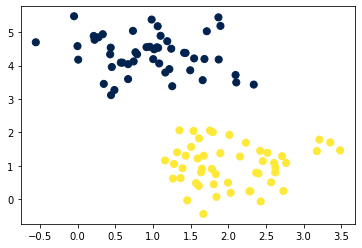

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cividis');

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 ]
svc=svm.SVC(probability=True)
# svc=svm.SVC()
model=GridSearchCV(svc,param_grid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
print('Split Successful')
model.fit(x_train,y_train)
print('Model has completed training')

In [ ]:
y_pred = model.predict(x_val)

In [ ]:
from sklearn import metrics
print("Classification report for - \n{}:\n{}\n".format(
    model, metrics.classification_report(y_val, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}]):
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       200
           1       0.64      0.57      0.61       200

    accuracy                           0.62       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.62      0.62       400




In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.625


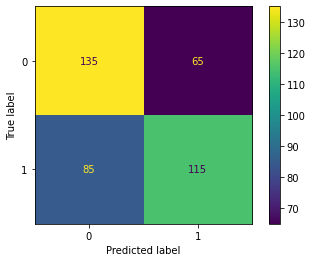

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()